In [196]:
import numpy as np
import pandas as pd

# First task, find relavant files

* several options here.  Can use shell `find` command

In [197]:
!find ./example_data/ -name '*.diffusion.nc' | head -n 10

./example_data//NPART4000/Radius4.0/dens0.025/T0.72871/LJCFS-CYL-NH_1_RAD_4.0_TEMP_0.72871_DENS_0.025_NPART_4000_.diffusion.nc
./example_data//NPART4000/Radius4.0/dens0.025/T0.72871/LJCFS-CYL-NH_2_RAD_4.0_TEMP_0.72871_DENS_0.025_NPART_4000_.diffusion.nc
./example_data//NPART4000/Radius4.0/dens0.05/T0.72871/LJCFS-CYL-NH_1_RAD_4.0_TEMP_0.72871_DENS_0.05_NPART_4000_.diffusion.nc
./example_data//NPART4000/Radius4.0/dens0.05/T0.72871/LJCFS-CYL-NH_2_RAD_4.0_TEMP_0.72871_DENS_0.05_NPART_4000_.diffusion.nc
./example_data//NPART4000/Radius4.0/dens0.075/T0.72871/LJCFS-CYL-NH_1_RAD_4.0_TEMP_0.72871_DENS_0.075_NPART_4000_.diffusion.nc
./example_data//NPART4000/Radius4.0/dens0.075/T0.72871/LJCFS-CYL-NH_2_RAD_4.0_TEMP_0.72871_DENS_0.075_NPART_4000_.diffusion.nc
./example_data//NPART4000/Radius4.0/dens0.1/T0.72871/LJCFS-CYL-NH_1_RAD_4.0_TEMP_0.72871_DENS_0.1_NPART_4000_.diffusion.nc
./example_data//NPART4000/Radius4.0/dens0.1/T0.72871/LJCFS-CYL-NH_2_RAD_4.0_TEMP_0.72871_DENS_0.1_NPART_4000_.diffusion

In [198]:
file_list = !find ./example_data/ -name '*.diffusion.nc'

In [199]:
file_list

['./example_data//NPART4000/Radius4.0/dens0.025/T0.72871/LJCFS-CYL-NH_1_RAD_4.0_TEMP_0.72871_DENS_0.025_NPART_4000_.diffusion.nc',
 './example_data//NPART4000/Radius4.0/dens0.025/T0.72871/LJCFS-CYL-NH_2_RAD_4.0_TEMP_0.72871_DENS_0.025_NPART_4000_.diffusion.nc',
 './example_data//NPART4000/Radius4.0/dens0.05/T0.72871/LJCFS-CYL-NH_1_RAD_4.0_TEMP_0.72871_DENS_0.05_NPART_4000_.diffusion.nc',
 './example_data//NPART4000/Radius4.0/dens0.05/T0.72871/LJCFS-CYL-NH_2_RAD_4.0_TEMP_0.72871_DENS_0.05_NPART_4000_.diffusion.nc',
 './example_data//NPART4000/Radius4.0/dens0.075/T0.72871/LJCFS-CYL-NH_1_RAD_4.0_TEMP_0.72871_DENS_0.075_NPART_4000_.diffusion.nc',
 './example_data//NPART4000/Radius4.0/dens0.075/T0.72871/LJCFS-CYL-NH_2_RAD_4.0_TEMP_0.72871_DENS_0.075_NPART_4000_.diffusion.nc',
 './example_data//NPART4000/Radius4.0/dens0.1/T0.72871/LJCFS-CYL-NH_1_RAD_4.0_TEMP_0.72871_DENS_0.1_NPART_4000_.diffusion.nc',
 './example_data//NPART4000/Radius4.0/dens0.1/T0.72871/LJCFS-CYL-NH_2_RAD_4.0_TEMP_0.72871_

In [200]:
print file_list[:3]

['./example_data//NPART4000/Radius4.0/dens0.025/T0.72871/LJCFS-CYL-NH_1_RAD_4.0_TEMP_0.72871_DENS_0.025_NPART_4000_.diffusion.nc', './example_data//NPART4000/Radius4.0/dens0.025/T0.72871/LJCFS-CYL-NH_2_RAD_4.0_TEMP_0.72871_DENS_0.025_NPART_4000_.diffusion.nc', './example_data//NPART4000/Radius4.0/dens0.05/T0.72871/LJCFS-CYL-NH_1_RAD_4.0_TEMP_0.72871_DENS_0.05_NPART_4000_.diffusion.nc']


# Going beyond text files

## could use text files:

 * but this is limited

In [201]:
!head -n 10 example_data/example_diffusion.dat

time MSD_z MSD_xy
0.0 0.0 0.0
0.00999999977648 0.00389118609019 0.00352267664857
0.019999999553 0.00777880288661 0.00701602036133
0.0299999993294 0.0116600431502 0.0104491692036
0.0399999991059 0.0155321508646 0.013793470338
0.0499999970198 0.019392600283 0.0170235838741
0.0599999986589 0.0232394430786 0.0201184339821
0.070000000298 0.0270714424551 0.023061754182
0.0799999982119 0.0308878663927 0.0258418451995


## my recommendation: use netcdf
 * built for arrays of data.
 * has good metadata support
 * easy to work with -> netCDF4 or the new xarray package

In [202]:
import netCDF4 as nc

In [203]:
t = nc.Dataset('./example_data/example_diffusion.nc')
t

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Region: [    8.             8.          3183.09141839]
    Temperature: 0.72871
    Npart: 4000
    NpartTot: 4000
    Anal_Npart: 4000
    description dir_code: code for each dimension
    dir_code: [2 2 1]
    dimensions(sizes): time(76), rec(14), type(1), dir_code(2)
    variables(dimensions): float32 time(time), float32 MSD(rec,type,dir_code,time), float32 CORR(rec,type,dir_code,time), float32 INTEGRAL_CORR(rec,type,dir_code,time), float32 MSD_COLLECTIVE(rec,type,dir_code,time)
    groups: 

In [204]:
t.variables['MSD']

<type 'netCDF4._netCDF4.Variable'>
float32 MSD(rec, type, dir_code, time)
    description: MSD
unlimited dimensions: 
current shape = (14, 1, 2, 76)
filling on, default _FillValue of 9.96920996839e+36 used

### even easier, use xarray

In [205]:
import xarray as xr

xarray is modeled on the netcdf format

In [206]:
ds = xr.open_dataset('example_data/example_diffusion.nc')
ds

<xarray.Dataset>
Dimensions:         (dir_code: 2, rec: 14, time: 76, type: 1)
Coordinates:
  * time            (time) float32 0.0 0.01 0.02 0.03 0.04 0.05 0.06 0.07 ...
  * dir_code        (dir_code) int64 0 1
  * rec             (rec) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13
  * type            (type) int64 0
Data variables:
    MSD             (rec, type, dir_code, time) float32 0.0 0.00389119 ...
    CORR            (rec, type, dir_code, time) float32 0.778382 0.777733 ...
    INTEGRAL_CORR   (rec, type, dir_code, time) float32 0.0 0.00778057 ...
    MSD_COLLECTIVE  (rec, type, dir_code, time) float32 0.0 1.05029e-26 ...
Attributes:
    Region: [    8.             8.          3183.09141839]
    Temperature: 0.72871
    Npart: 4000
    NpartTot: 4000
    Anal_Npart: 4000
    description dir_code: code for each dimension
    dir_code: [2 2 1]

## xarray is like pandas, but for greater than 2D

## fundamental objects: DataArray (single variable)

# Dataset: multiple variables

In [207]:
ds

<xarray.Dataset>
Dimensions:         (dir_code: 2, rec: 14, time: 76, type: 1)
Coordinates:
  * time            (time) float32 0.0 0.01 0.02 0.03 0.04 0.05 0.06 0.07 ...
  * dir_code        (dir_code) int64 0 1
  * rec             (rec) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13
  * type            (type) int64 0
Data variables:
    MSD             (rec, type, dir_code, time) float32 0.0 0.00389119 ...
    CORR            (rec, type, dir_code, time) float32 0.778382 0.777733 ...
    INTEGRAL_CORR   (rec, type, dir_code, time) float32 0.0 0.00778057 ...
    MSD_COLLECTIVE  (rec, type, dir_code, time) float32 0.0 1.05029e-26 ...
Attributes:
    Region: [    8.             8.          3183.09141839]
    Temperature: 0.72871
    Npart: 4000
    NpartTot: 4000
    Anal_Npart: 4000
    description dir_code: code for each dimension
    dir_code: [2 2 1]

## can do cool things
 * select by value
 * apply functions by named dimension

In [208]:
#select data with time closest to 20.0
ds.sel(time=20.0, method='nearest')

<xarray.Dataset>
Dimensions:         (dir_code: 2, rec: 14, type: 1)
Coordinates:
    time            float32 20.0
  * dir_code        (dir_code) int64 0 1
  * rec             (rec) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13
  * type            (type) int64 0
Data variables:
    MSD             (rec, type, dir_code) float32 2.85597 0.235543 2.36165 ...
    CORR            (rec, type, dir_code) float32 0.0908736 -0.00644757 ...
    INTEGRAL_CORR   (rec, type, dir_code) float32 4.30577 0.0165321 3.19536 ...
    MSD_COLLECTIVE  (rec, type, dir_code) float32 1.10404e-26 0.00631368 ...
Attributes:
    Region: [    8.             8.          3183.09141839]
    Temperature: 0.72871
    Npart: 4000
    NpartTot: 4000
    Anal_Npart: 4000
    description dir_code: code for each dimension
    dir_code: [2 2 1]

In [209]:
#select data with dir_code==0 and type==0
ds.sel(dir_code=0, type=0)

<xarray.Dataset>
Dimensions:         (rec: 14, time: 76)
Coordinates:
  * time            (time) float32 0.0 0.01 0.02 0.03 0.04 0.05 0.06 0.07 ...
    dir_code        int64 0
  * rec             (rec) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13
    type            int64 0
Data variables:
    MSD             (rec, time) float32 0.0 0.00389119 0.0077788 0.01166 ...
    CORR            (rec, time) float32 0.778382 0.777733 0.775962 0.773148 ...
    INTEGRAL_CORR   (rec, time) float32 0.0 0.00778057 0.015549 0.0232946 ...
    MSD_COLLECTIVE  (rec, time) float32 0.0 1.05029e-26 8.91377e-27 ...
Attributes:
    Region: [    8.             8.          3183.09141839]
    Temperature: 0.72871
    Npart: 4000
    NpartTot: 4000
    Anal_Npart: 4000
    description dir_code: code for each dimension
    dir_code: [2 2 1]

In [210]:
#mean over records
ds.sel(dir_code=0, type=0, rec=slice(1,None)).mean('rec')

<xarray.Dataset>
Dimensions:         (time: 76)
Coordinates:
  * time            (time) float32 0.0 0.01 0.02 0.03 0.04 0.05 0.06 0.07 ...
Data variables:
    MSD             (time) float32 0.0 0.00364834 0.00729395 0.0109343 ...
    CORR            (time) float32 0.729747 0.729192 0.727587 0.725019 ...
    INTEGRAL_CORR   (time) float32 0.0 0.00729469 0.0145786 0.0218416 ...
    MSD_COLLECTIVE  (time) float32 0.0 1.24137e-26 1.17918e-26 1.19935e-26 ...

## can merge/ concat/ etc


In [211]:
da1 = xr.DataArray(np.random.rand(1,5),[('x',[-1]),('y',range(5))])
da2 = xr.DataArray(np.random.rand(4,5),dims=['x','y'])
print da1
print da2


<xarray.DataArray (x: 1, y: 5)>
array([[ 0.08923619,  0.6490251 ,  0.52356431,  0.95886788,  0.5796481 ]])
Coordinates:
  * x        (x) int64 -1
  * y        (y) int64 0 1 2 3 4
<xarray.DataArray (x: 4, y: 5)>
array([[ 0.74995107,  0.08795759,  0.3976517 ,  0.51506063,  0.30171932],
       [ 0.14367126,  0.56969178,  0.05567982,  0.91532827,  0.87368981],
       [ 0.5938945 ,  0.28232684,  0.25066672,  0.2157298 ,  0.31236081],
       [ 0.53277028,  0.83079308,  0.18924781,  0.60996909,  0.2775537 ]])
Coordinates:
  * x        (x) int64 0 1 2 3
  * y        (y) int64 0 1 2 3 4


In [212]:
xr.concat((da1,da2),'x')

<xarray.DataArray (x: 5, y: 5)>
array([[ 0.08923619,  0.6490251 ,  0.52356431,  0.95886788,  0.5796481 ],
       [ 0.74995107,  0.08795759,  0.3976517 ,  0.51506063,  0.30171932],
       [ 0.14367126,  0.56969178,  0.05567982,  0.91532827,  0.87368981],
       [ 0.5938945 ,  0.28232684,  0.25066672,  0.2157298 ,  0.31236081],
       [ 0.53277028,  0.83079308,  0.18924781,  0.60996909,  0.2775537 ]])
Coordinates:
  * y        (y) int64 0 1 2 3 4
  * x        (x) int64 -1 0 1 2 3

# calculate diffusion

$$D_z = \lim_{t\rightarrow \infty} \frac{\langle\delta z^2 \rangle}{2 t}$$

In [213]:
%matplotlib inline
import matplotlib.pyplot as plt

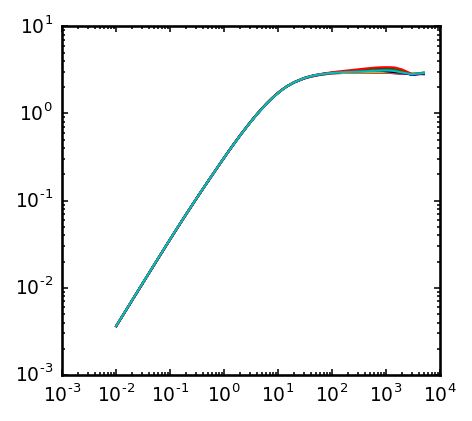

In [214]:
_ = plt.loglog(ds.time,ds.MSD.sel(dir_code=0, type=0, rec=slice(3,None)).T)

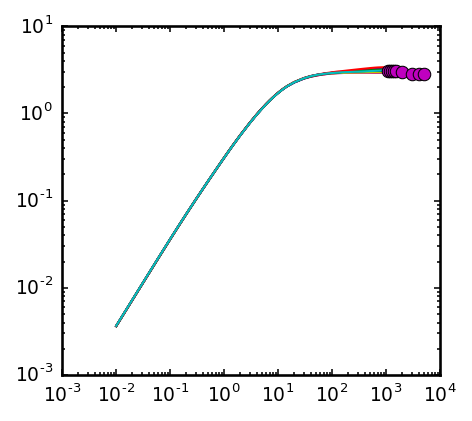

In [215]:
t = ds.MSD.sel(time=ds.time>1000., type=0, dir_code=0, rec=slice(3,None))

plt.loglog(ds.time, ds.MSD.sel(dir_code=0, type=0, rec=slice(3,None)).T)
plt.plot(t.time, t.mean('rec'), 'o')


In [216]:
# lets get the average diffusion
def get_diffusion(ds, tmin, n_skip, **kwargs):
    # mask and select data
    msk = ds.time > tmin
    da = ds.MSD.sel(time=msk, rec=slice(n_skip,None),**kwargs)
    
    # form new dataset
    out = xr.Dataset({'D':da.mean(['rec','time']),'D_std':da.std(['rec','time']),
                'tmin':tmin, 'nrec':len(da.rec), 'ntime':len(da.time)})
    return out
    

In [217]:
out = get_diffusion(ds, 1000, 1, dir_code=0, type=0)
out

<xarray.Dataset>
Dimensions:   ()
Coordinates:
    dir_code  int64 0
    type      int64 0
Data variables:
    nrec      int64 13
    ntime     int64 9
    tmin      int64 1000
    D         float32 3.12357
    D_std     float32 0.503832

In [218]:
xr.concat([out],'val').to_dataframe()

,dir_code,type,nrec,tmin,ntime,D,D_std
val,,,,,,,
0,0,0,13,1000,9,3.12357,0.503832


In [219]:
# progress bar
from tqdm import tqdm

In [220]:
file_list

['./example_data//NPART4000/Radius4.0/dens0.025/T0.72871/LJCFS-CYL-NH_1_RAD_4.0_TEMP_0.72871_DENS_0.025_NPART_4000_.diffusion.nc',
 './example_data//NPART4000/Radius4.0/dens0.025/T0.72871/LJCFS-CYL-NH_2_RAD_4.0_TEMP_0.72871_DENS_0.025_NPART_4000_.diffusion.nc',
 './example_data//NPART4000/Radius4.0/dens0.05/T0.72871/LJCFS-CYL-NH_1_RAD_4.0_TEMP_0.72871_DENS_0.05_NPART_4000_.diffusion.nc',
 './example_data//NPART4000/Radius4.0/dens0.05/T0.72871/LJCFS-CYL-NH_2_RAD_4.0_TEMP_0.72871_DENS_0.05_NPART_4000_.diffusion.nc',
 './example_data//NPART4000/Radius4.0/dens0.075/T0.72871/LJCFS-CYL-NH_1_RAD_4.0_TEMP_0.72871_DENS_0.075_NPART_4000_.diffusion.nc',
 './example_data//NPART4000/Radius4.0/dens0.075/T0.72871/LJCFS-CYL-NH_2_RAD_4.0_TEMP_0.72871_DENS_0.075_NPART_4000_.diffusion.nc',
 './example_data//NPART4000/Radius4.0/dens0.1/T0.72871/LJCFS-CYL-NH_1_RAD_4.0_TEMP_0.72871_DENS_0.1_NPART_4000_.diffusion.nc',
 './example_data//NPART4000/Radius4.0/dens0.1/T0.72871/LJCFS-CYL-NH_2_RAD_4.0_TEMP_0.72871_

In [221]:
tmin = 1000.
dir_code = 0
Dtype = 0
L = []
for fname in tqdm(file_list, leave=True):
    ds = xr.open_dataset(fname)
    out = get_diffusion(ds, tmin=tmin, n_skip=1, dir_code=0, type=Dtype ) 
    out['path'] = fname
    L.append(out)
    

100%|██████████| 42/42 [00:00<00:00, 106.46it/s]


In [222]:
ds_out = xr.concat(L,'index')
ds_out

<xarray.Dataset>
Dimensions:   (index: 42)
Coordinates:
    dir_code  int64 0
    type      int64 0
  * index     (index) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
Data variables:
    nrec      (index) int64 13 13 13 13 13 13 13 11 13 8 13 6 13 4 13 3 13 2 ...
    tmin      (index) float64 1e+03 1e+03 1e+03 1e+03 1e+03 1e+03 1e+03 ...
    D         (index) float32 3.07262 3.12357 1.44567 1.44583 0.961382 ...
    path      (index) |S126 './example_data//NPART4000/Radius4.0/dens0.025/T0.72871/LJCFS-CYL-NH_1_RAD_4.0_TEMP_0.72871_DENS_0.025_NPART_4000_.diffusion.nc' ...
    ntime     (index) int64 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 ...
    D_std     (index) float32 0.398093 0.503832 0.0242462 0.0255421 ...

In [223]:
df = ds_out.to_dataframe()
df.head()

,dir_code,type,nrec,tmin,D,path,ntime,D_std
index,,,,,,,,
0,0,0,13,1000.0,3.072620,./example_data//NPART4000/Radius4.0/dens0.025/...,9,0.398093
1,0,0,13,1000.0,3.123570,./example_data//NPART4000/Radius4.0/dens0.025/...,9,0.503832
2,0,0,13,1000.0,1.445670,./example_data//NPART4000/Radius4.0/dens0.05/T...,9,0.024246
3,0,0,13,1000.0,1.445833,./example_data//NPART4000/Radius4.0/dens0.05/T...,9,0.025542
4,0,0,13,1000.0,0.961382,./example_data//NPART4000/Radius4.0/dens0.075/...,9,0.008758


# get meta data from path

In [224]:
path = df.iloc[0].path
path

'./example_data//NPART4000/Radius4.0/dens0.025/T0.72871/LJCFS-CYL-NH_1_RAD_4.0_TEMP_0.72871_DENS_0.025_NPART_4000_.diffusion.nc'

In [225]:
import os
base = os.path.basename(path)
print base

LJCFS-CYL-NH_1_RAD_4.0_TEMP_0.72871_DENS_0.025_NPART_4000_.diffusion.nc


In [226]:
print base.split('_')

['LJCFS-CYL-NH', '1', 'RAD', '4.0', 'TEMP', '0.72871', 'DENS', '0.025', 'NPART', '4000', '.diffusion.nc']


In [227]:
def get_meta(path):
    base = os.path.basename(path)
    x = base.split('_')
    d = {}
    d['prefix'] = x[0]
    d['rn'] = x[1]
    
    for k, v in zip(x[2::2],x[3::2]):
        d[k.lower()] = v
    return d

In [228]:
get_meta(path)

{'dens': '0.025',
 'npart': '4000',
 'prefix': 'LJCFS-CYL-NH',
 'rad': '4.0',
 'rn': '1',
 'temp': '0.72871'}

In [229]:
df_meta = df['path'].apply(lambda x: pd.Series(get_meta(x)))
df_meta.head()

,dens,npart,prefix,rad,rn,temp
index,,,,,,
0,0.025,4000,LJCFS-CYL-NH,4.0,1,0.72871
1,0.025,4000,LJCFS-CYL-NH,4.0,2,0.72871
2,0.05,4000,LJCFS-CYL-NH,4.0,1,0.72871
3,0.05,4000,LJCFS-CYL-NH,4.0,2,0.72871
4,0.075,4000,LJCFS-CYL-NH,4.0,1,0.72871


In [230]:
df_final = df.join(df_meta)

In [232]:
df_final.head()

,dir_code,type,nrec,tmin,D,path,ntime,D_std,dens,npart,prefix,rad,rn,temp
index,,,,,,,,,,,,,,
0,0,0,13,1000.0,3.072620,./example_data//NPART4000/Radius4.0/dens0.025/...,9,0.398093,0.025,4000,LJCFS-CYL-NH,4.0,1,0.72871
1,0,0,13,1000.0,3.123570,./example_data//NPART4000/Radius4.0/dens0.025/...,9,0.503832,0.025,4000,LJCFS-CYL-NH,4.0,2,0.72871
2,0,0,13,1000.0,1.445670,./example_data//NPART4000/Radius4.0/dens0.05/T...,9,0.024246,0.05,4000,LJCFS-CYL-NH,4.0,1,0.72871
3,0,0,13,1000.0,1.445833,./example_data//NPART4000/Radius4.0/dens0.05/T...,9,0.025542,0.05,4000,LJCFS-CYL-NH,4.0,2,0.72871
4,0,0,13,1000.0,0.961382,./example_data//NPART4000/Radius4.0/dens0.075/...,9,0.008758,0.075,4000,LJCFS-CYL-NH,4.0,1,0.72871
